#Pre Q1 Scripts

In [0]:
#code cell for extracting contents of zipf (data-lab3.zip) to this directory


import zipfile

zipf = 'data-lab4.zip'
gdrive = '/gdrive/My Drive/colab/'
file = gdrive+zipf
zi = zipfile.ZipFile(file, 'r')
zi.extractall()

In [0]:
#code cell for mounting colab to google drive
#run this every time need to re-instantiate connection to colab servers

from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


#Question 1: Data

In [0]:
import keras
import numpy as np
import os
import random
import re
from keras.utils import to_categorical

base_path = 'data-lab4'
#base_path = input('Submit path of directory including folder holding the 2 csv files')
#
x_train=[]   #data
x_test=[]
y_train=[]   #labels
y_test=[]


n=0

with open(base_path+'/training.csv', encoding='ISO-8859-1') as train, open(base_path+'/testing.csv', encoding='ISO-8859-1') as test: 
  for line in train:
#     if n > 100000:
#       break
#     n+=1
    ln = line.split(',')
    for i in [0,5]:
      ln[i] = re.sub('"', '', ln[i])
    y_train.append(ln[0])
    x_train.append(ln[5])
  for line in test:
    ln = line.split(',')
    for i in [0,5]:
      ln[i] = re.sub('"', '', ln[i])
    y_test.append(ln[0])
    x_test.append(ln[5])
    
len_train = len(x_train)
len_test = len(x_test)    
  
  
print('Finished reading. %d Testing Samples, %d Training samples.' % (len_test, len_train))


y_test = np.array(y_test)
cats, testCounts = np.unique(y_test, return_counts=True)

y_train = np.array(y_train)
trainCats, trainCounts = np.unique(y_train, return_counts=True)
train_zip = dict(zip(trainCats, trainCounts))
for i in cats:
  if i not in train_zip.keys():
    train_zip[i]=0



Finished reading. 490 Testing Samples, 1586588 Training samples.


In [0]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_test = vectorizer.transform(x_test)
X_train= vectorizer.transform(x_train)

Y_test = to_categorical(y_test, 5)
Y_train = to_categorical(y_train)




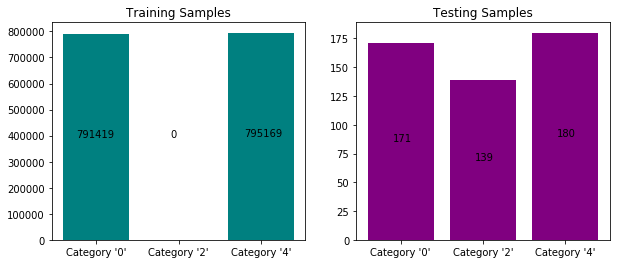

In [0]:
import matplotlib.pyplot as plt

xcoord = ['Category \'0\'', 'Category \'2\'', 'Category \'4\'']

gs = plt.GridSpec(1,2) #wspace=0.3
fig = plt.figure(figsize=(10,4))

train = plt.subplot(gs[0,0])
train_heights = [train_zip['0'], train_zip['2'], train_zip['4']]
train.bar(xcoord, train_heights, color='teal')
train.set_title('Training Samples')
train.text(-0.25,train_heights[0]/2,str(train_heights[0]))
train.text(0.9,train_heights[0]/2,str(train_heights[1]))
train.text(1.8,train_heights[2]/2,str(train_heights[2]))


test = plt.subplot(gs[0,1])
test_heights = [i for i in testCounts]
test.bar(xcoord, test_heights, color='purple')
test.set_title('Testing Samples')
test.text(-0.1,test_heights[0]/2,str(test_heights[0]))
test.text(0.9,test_heights[1]/2,str(test_heights[1]))
test.text(1.9,test_heights[2]/2,str(test_heights[2]))


plt.show()





#Question 2: Classification

In [0]:
from keras.layers import Dense
from keras import Sequential

# Create a neural network using Keras and add at least 2 hidden layers. You may choose the
# number of units, types of layers, activation functions, etc. Recall that the input layer will define
# the shape of the first hidden layer, and that the output layer size will dictate the output size of the
# last hidden layer.

#num_samples = X_train.shape[0]
num_features = X_train.shape[1]

# print(X_train.shape)
# print(cats)

model = Sequential()
model.add(Dense(32, input_dim=num_features, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

SGD = keras.optimizers.SGD(lr=0.04)

model.compile(loss='categorical_crossentropy', optimizer=SGD, metrics=['accuracy'] )

model.summary()

EPOCHS = 2
H = model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_test, Y_test), batch_size=100)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                20419968  
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 45        
Total params: 20,420,277
Trainable params: 20,420,277
Non-trainable params: 0
_________________________________________________________________
Train on 1586588 samples, validate on 490 samples
Epoch 1/2
1586588/1586588 [==============================] - 4726s 3ms/step - loss: 0.5039 - acc: 0.7550 - val_loss: 3.0121 - val_acc: 0.5551
Epoch 2/2
1586588/1586588 [==============================] - 4745s 3ms/step - loss: 0.4626 - acc: 0.7815 - val_loss: 3.1487 - val_acc: 0.5633


#Question 3: Evaluation

              precision    recall  f1-score   support

           0       0.69      0.77      0.72       171
           2       0.00      0.00      0.00       139
           4       0.48      0.81      0.61       180

   micro avg       0.56      0.56      0.56       490
   macro avg       0.39      0.52      0.44       490
weighted avg       0.42      0.56      0.47       490



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


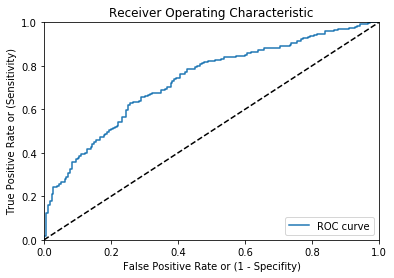

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

# Compare the predictions from your test data to the known labels using the following
# metrics:
# Use the classification_report from scikit-learn to report precision, recall, and f1-score.
# Visualize your results by displaying a ROC curve - a probability curve plotting the true
# positive rate against the false positive rate. Put FPR on the x-axis and TPR on the y-axis.
# Use roc_curve from scikit-learn to help with this step

predictions = model.predict(X_test)
categories = ['0', '1', '2','3','4']
#compare returned predictions to the known labels using classification_report
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=cats))

y_true = Y_test.argmax(axis=1)
y_true[y_true < 4] = 1
y_true[y_true == 4] = 0
y_score = predictions[:,0]

#fpr: Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
#tpr: Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
#threshes: Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.
fpr, tpr, threshes = roc_curve(y_true, y_score)


#viz results by displaying ROC curve - a probability curve plotting the true 
  #positive rate against the false positive rate.
  #put FPR on x-axis and TPR on y-axis.
  #use roc_curve from scikit-learn
  
  
  
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

